# Practice Exercise: Gaussian Mixture Models

## Scenario:
You’re analyzing test scores of students across two subjects, **Math** and **Science**. You suspect that students fall into two clusters based on their performance.

In [27]:
from sklearn.mixture import GaussianMixture
import pandas as pd 
import matplotlib.pyplot as plt

## Data:
students = pd.DataFrame({
    "Math Scores": [78, 72, 90, 88, 92, 60, 58, 55, 54, 95],
    "Science Scores": [80, 75, 91, 87, 93, 62, 59, 57, 56, 96]
})
students.head(5)

,Math Scores,Science Scores
0,78,80
1,72,75
2,90,91
3,88,87
4,92,93


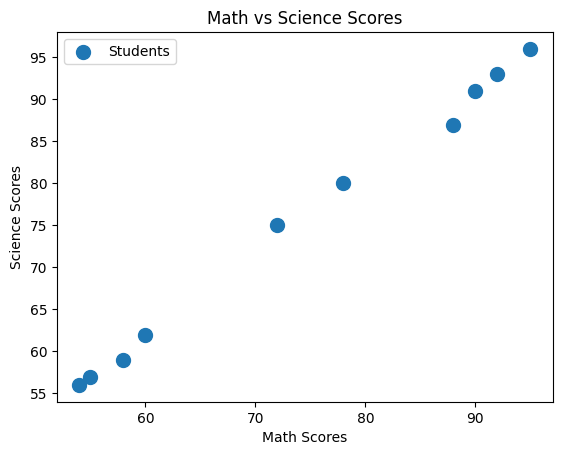

In [28]:
# Visualize the data
plt.scatter(students['Math Scores'], students['Science Scores'], label = 'Students', s = 100)
plt.xlabel('Math Scores')
plt.ylabel('Science Scores')
plt.title('Math vs Science Scores')
plt.legend()
plt.show()

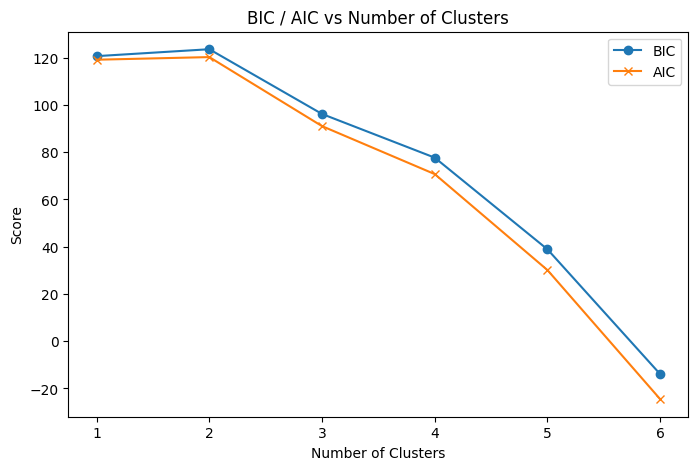

Look for the elbow


In [29]:
# Find the optimal number of clusters (BIC / AIC)
original_data = students[['Math Scores', 'Science Scores']]

bic_scores = []
aic_scores = []
n_components_range = range(1, 7) # checking for 1 to 6 clusters

# Fit GMM for each number of clusters
for n in n_components_range:
    gmm = GaussianMixture(n_components = n, random_state = 10)
    gmm.fit(original_data)
    bic_scores.append(gmm.bic(original_data))
    aic_scores.append(gmm.aic(original_data))

# Plot the BIC and AIC
plt.figure(figsize = (8, 5))
plt.plot(n_components_range, bic_scores, label = 'BIC', marker = 'o')
plt.plot(n_components_range, aic_scores, label = 'AIC', marker = 'x')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC / AIC vs Number of Clusters')
plt.legend()
plt.show()

print('Look for the elbow')

In [30]:
gmm = GaussianMixture(n_components = 4, random_state = 10)
students['Cluster'] = gmm.fit_predict(students)
students

,Math Scores,Science Scores,Cluster
0,78,80,3
1,72,75,2
2,90,91,1
3,88,87,1
4,92,93,1
5,60,62,0
6,58,59,0
7,55,57,0
8,54,56,0
9,95,96,1


In [31]:
# Cluster Probabilities
original_data = students[['Math Scores', 'Science Scores']]
students['Cluster Probabilities'] = gmm.predict_proba(original_data)[:, 0]
students

,Math Scores,Science Scores,Cluster,Cluster Probabilities
0,78,80,3,6.405352e-26
1,72,75,2,1.486662e-20
2,90,91,1,8.950145e-44
3,88,87,1,1.588533e-38
4,92,93,1,1.092323e-49
5,60,62,0,1.000000e+00
6,58,59,0,1.000000e+00
7,55,57,0,1.000000e+00
8,54,56,0,1.000000e+00
9,95,96,1,3.683776e-58


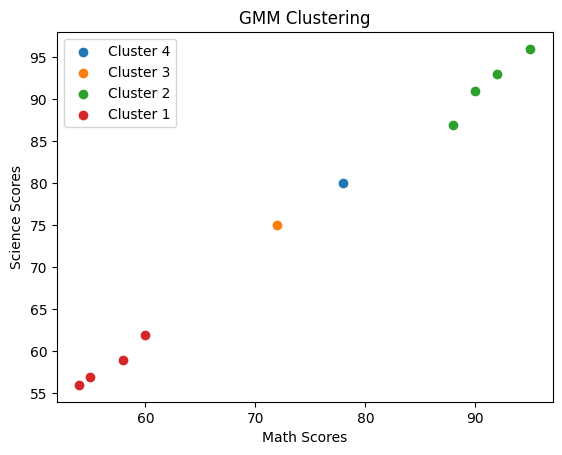

In [32]:
# Visualize the clusters
for cluster in students['Cluster'].unique():
    cluster_data = students[students['Cluster'] == cluster]
    label = cluster + 1
    plt.scatter(cluster_data['Math Scores'], cluster_data['Science Scores'], label = f'Cluster {label}')

plt.xlabel('Math Scores')
plt.ylabel('Science Scores')
plt.title('GMM Clustering')
plt.legend()
plt.show()

### Metrics

In [35]:
# Cluster Probability Mean
probabilities = gmm.predict_proba(original_data)
average_probs = probabilities.max(axis = 1).mean()
print(f'Average Cluster Assignment Probability: {average_probs}')

Average Cluster Assignment Probability: 0.25


In [34]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(original_data, students['Cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.5596764594846276


In [36]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
calinski = calinski_harabasz_score(original_data, students['Cluster'])
print(f'Calinksi-Harabasz Index: {calinski}')

Calinksi-Harabasz Index: 81.81456953642385
